예측 결과 : [1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]


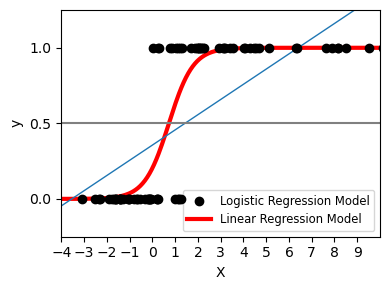

<Figure size 640x480 with 0 Axes>

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.special import expit
from sklearn import linear_model

# plot을 그려주는 함수입니다.
def plot_logistic_regression(model, X_data, y_data):
    # and plot the result
    plt.figure(1, figsize=(4, 3))
    plt.clf()
    plt.scatter(X_data.ravel(), y_data, color='black', zorder=20)
    X_test = np.linspace(-5, 10, 300)

    loss = expit(X_test * model.coef_ + model.intercept_).ravel()
    plt.plot(X_test, loss, color='red', linewidth=3)
    ols = linear_model.LinearRegression()
    ols.fit(X_data, y_data)
    plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
    plt.axhline(.5, color='.5')

    plt.ylabel('y')
    plt.xlabel('X')
    plt.xticks(range(-5, 10))
    plt.yticks([0, 0.5, 1])
    plt.ylim(-.25, 1.25)
    plt.xlim(-4, 10)
    plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
               loc="lower right", fontsize='small')
    plt.tight_layout()
    plt.show()
    plt.savefig('log_image.png')

# 데이터를 생성하고 반환하는 함수입니다.
def load_data():
    
    np.random.seed(0)
    
    X = np.random.normal(size = 100)
    y = (X > 0).astype(np.float64)
    X[X > 0] *= 5
    X += .7 * np.random.normal(size = 100)
    X = X[:, np.newaxis]
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 100)
    
    return train_X, test_X, train_y, test_y
"""
1. 로지스틱 회귀 모델을 구현하고, 
   학습 결과를 확인할 수 있는 main() 함수를 완성합니다. 
"""
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    logistic_model = LogisticRegression()
    
    logistic_model.fit(train_X,train_y)
    
    predicted = logistic_model.predict(test_X)
    
    # 예측 결과 확인하기 
    print("예측 결과 :", predicted[:10])
    
    plot_logistic_regression(logistic_model, train_X, train_y)
    
    return logistic_model

if __name__ == "__main__":
    main()
